# Graph Embedding
- Graph embedding is an approach to transform nodes, edged, and their features into vector space.
- Embedding is a pre-processing step in order to transform a graph into a computationally manageable format.  
- Embedding can be performed at node, subgraph, or graph level as well as through strategies such as random walk.
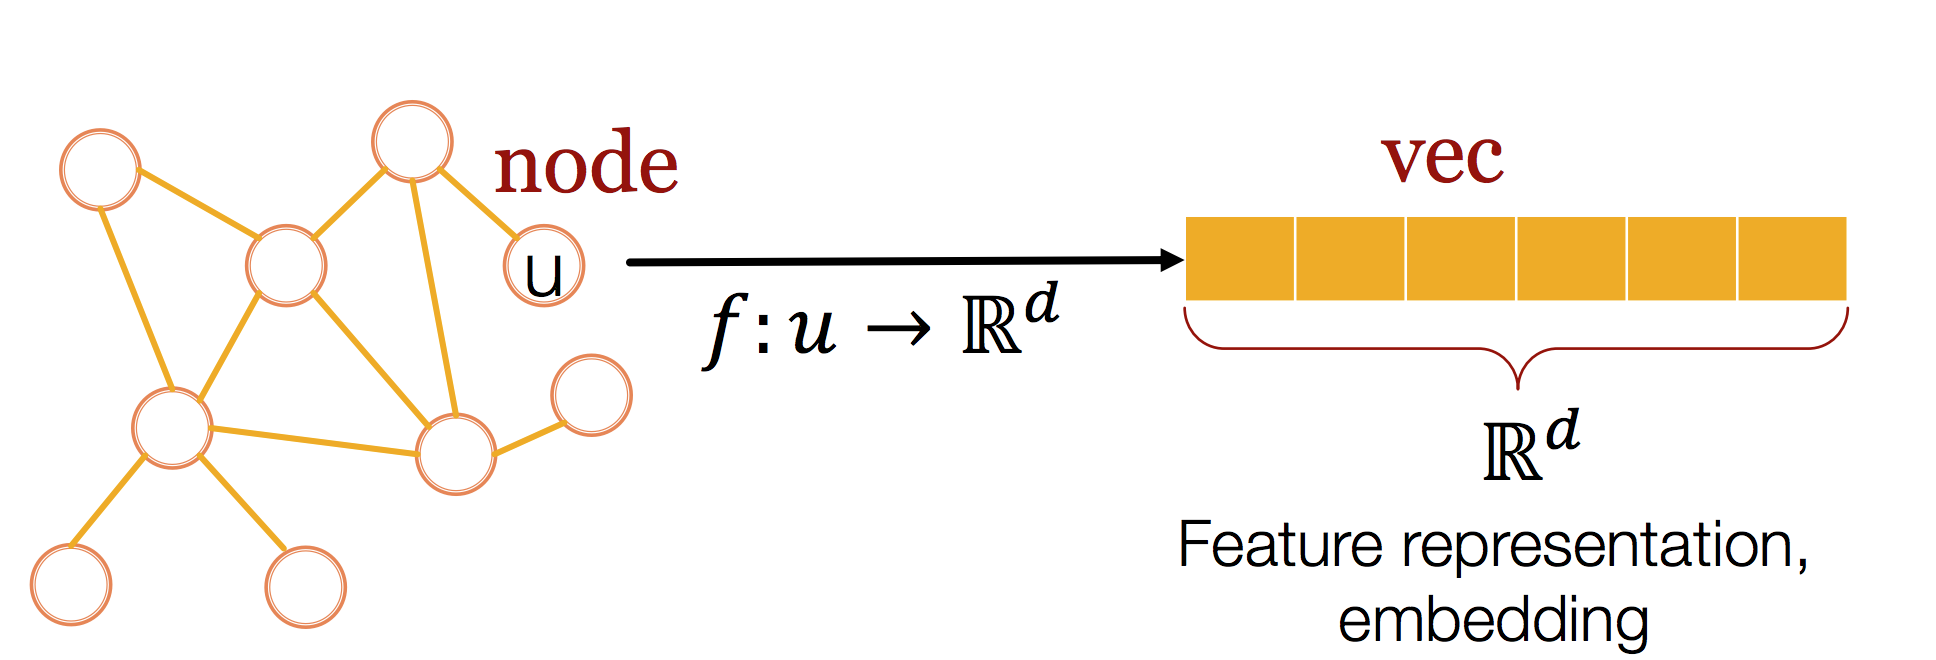
imaged borrowed from [CS224W-Stanford](http://snap.stanford.edu/class/cs224w-2018/handouts/09-node2vec.pdf)

# What does network embedding do?
- Created a low dimensional representation of graph nodes.
- Similarity of embedding indicate similarity of nodes.
- Generates node representation.
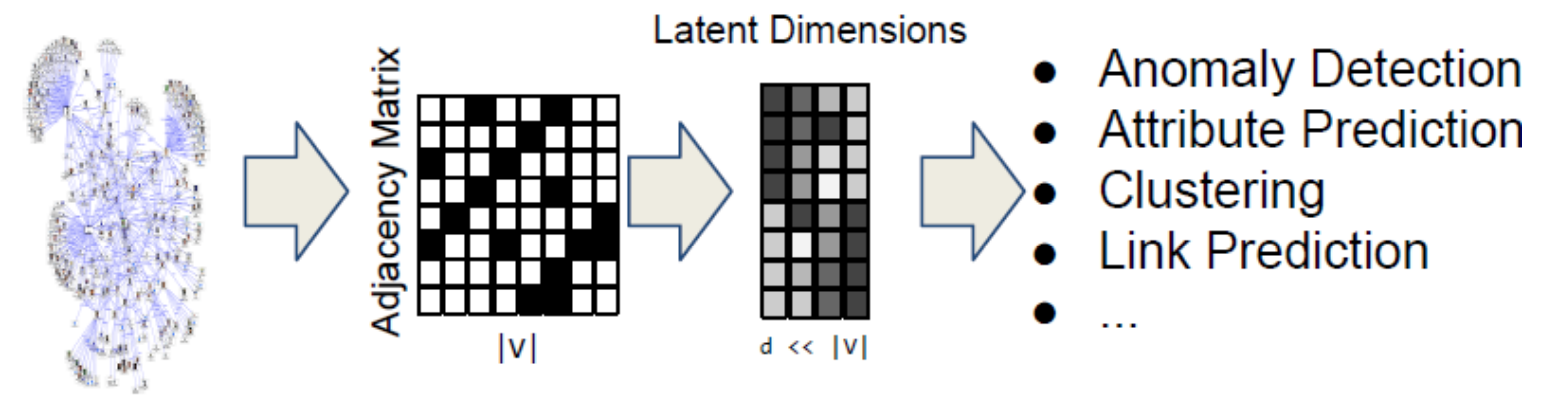


# 2D Embedding of Nodes for Zachary's Karate Club
- Embedding preserves clustering
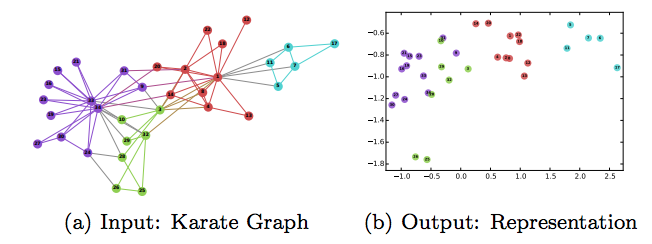
image from [Deep Walk paper](https://arxiv.org/pdf/1403.6652.pdf)

# Types of Embedding
- Vertex(node) embedding:  We encode each vertex (node) with its own vector representation. We would use this embedding when we want to perform visualization or prediction on the vertex level. vertex prediction is amongst use cases for node embedding.
- Graph embedding: We use graph embedding to create representation for a whole graph or its subgraphs. comparing molecular structure is a common use case for graph embedding.

[ref](https://towardsdatascience.com/graph-embeddings-the-summary-cc6075aba007)

# Vertex Embedding Approaches:
- **Deep Walk:** uses random walks to produce embeddings. The random walk starts in a selected node then we move to the random neighbor from a current node for a defined number of steps.
- **Node2Vec:** It is similar to deep walk, but it introduces probabilities of finding undiscovered parts of graph as well as returning to a previous position.
- **Structural Deep Network Embedding (SDNE)**: Measures similarity between nodes (through connectedness) as well as well as neighborhood similarity in order to understand overall graph structure.

# Deep Walk 
- Deep walk traverses the the graph by moving to random neighbors of a node for a certain number of steps. The method consists of three steps:
 1. Sampling: A graph is sampled with random walks. Few random walks from each node are performed. Authors show that it is sufficient to perform from 32 to 64 random walks from each node. They also show that good random walks have a length of about 40 steps.
 2. Training skip-gram: Random walks are comparable to sentences in word2vec approach. The skip-gram network accepts a node from the random walk as a one-hot vector as an input and maximizes the probability for predicting neighbor nodes. It is typically trained to predict around 20 neighbor nodes — 10 nodes left and 10 nodes right.
 3. Computing embeddings: Embedding is the output of a hidden layer of the network. The DeepWalk computes embedding for each node in the graph.
- Deep walk does not preserve the local neighborhood of the node.

[paper](https://arxiv.org/pdf/1403.6652.pdf)

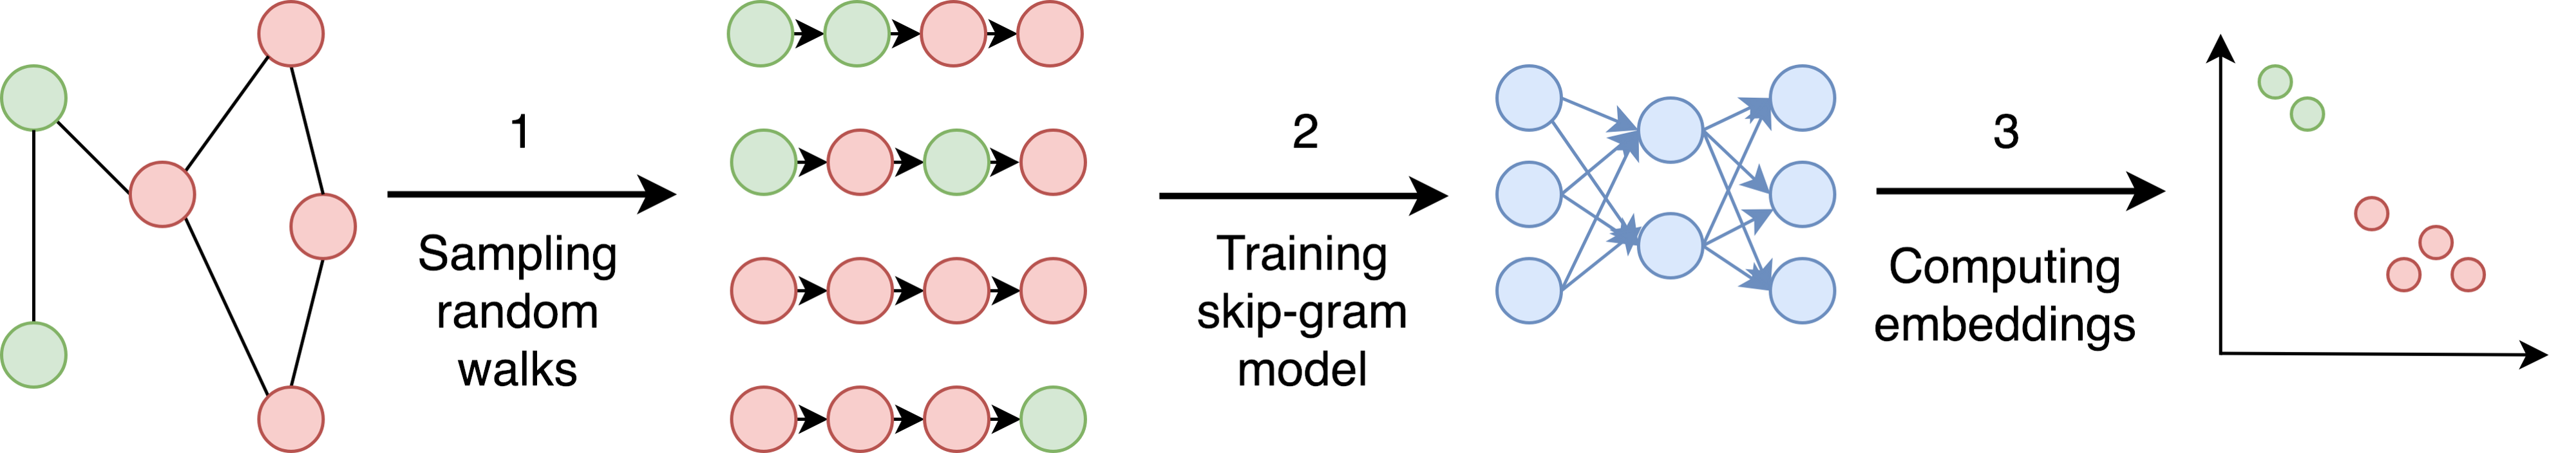
picture borrowed from [Primoz Godec](https://towardsdatascience.com/graph-embeddings-the-summary-cc6075aba007)

# Node2Vec
- Node2vec is a modification of DeepWalk with the small difference in random walks. Node2vec features a walk bias variable α, which is parameterized by p and q.
 - p prioritizes a breadth-first-search (BFS) procedure and is ideal for discovering local neighborhood.
 - q prioritizes a depth-first-search (DFS) procedure and is ideal for discovering global variables.
 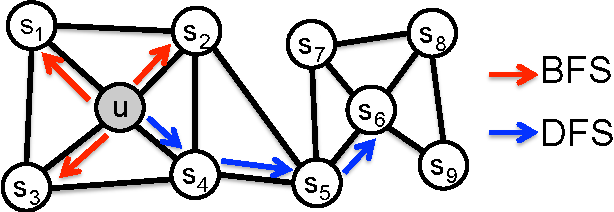

[paper](https://cs.stanford.edu/people/jure/pubs/node2vec-kdd16.pdf)

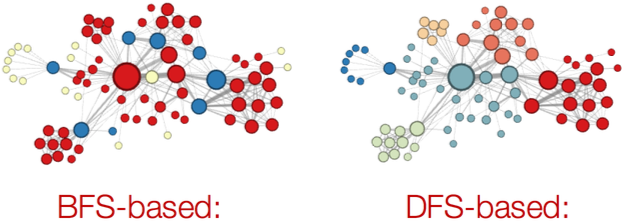
BFS is better at classifying according to structural roles (hubs, bridges, outliers, etc.) while DFS returns a more community driven classification scheme.

# SNDE
- SNDE does not use walks; instead, it learns from two distinct metrics:
 - First Order Proximity: two nodes are considered similar if they share an edge. Laplacian Eigenmap embedding algorithm applies a penalty when similar nodes are mapped far from each other in the embedded space, thus allowing for optimization by minimizing the space between similar nodes.
 - Second order Proximity: two nodes are considered similar if they share multiple neighborhoods. Second-order proximity is learned via autoencoders, which accept node adjacency vector and are trained to reconstruct node adjacency.
 

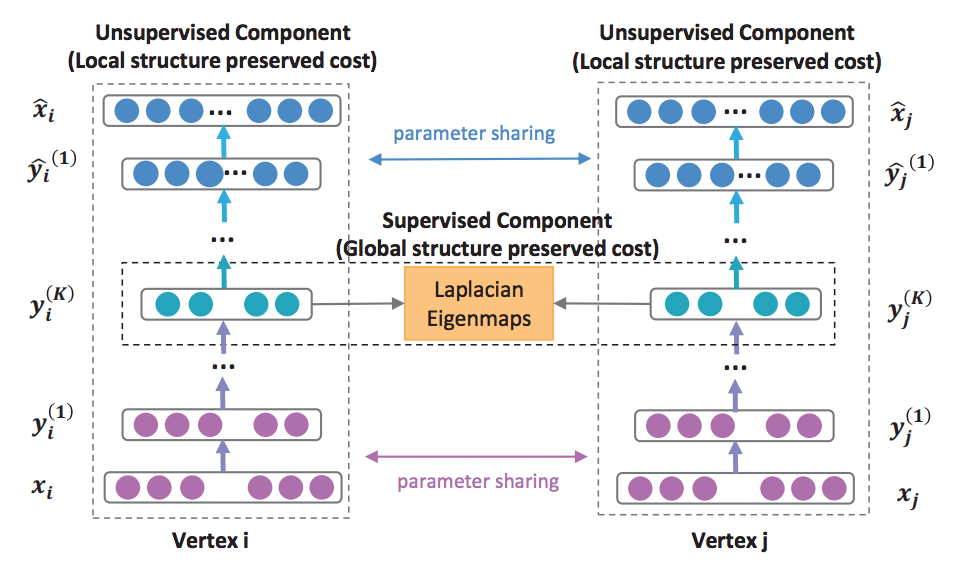

# Graph Embedding
- inspired by Doc2Vec, graph2vec essentially learns to embed a graph’s sub-graphs.
- Graph2Vec is analogous to Doc2Vec in a way that as a document contains sentences, a graph is composed of subgraphs.
- Graph2Vec performs three steps: sampling, training skipgram, and computing embedding.
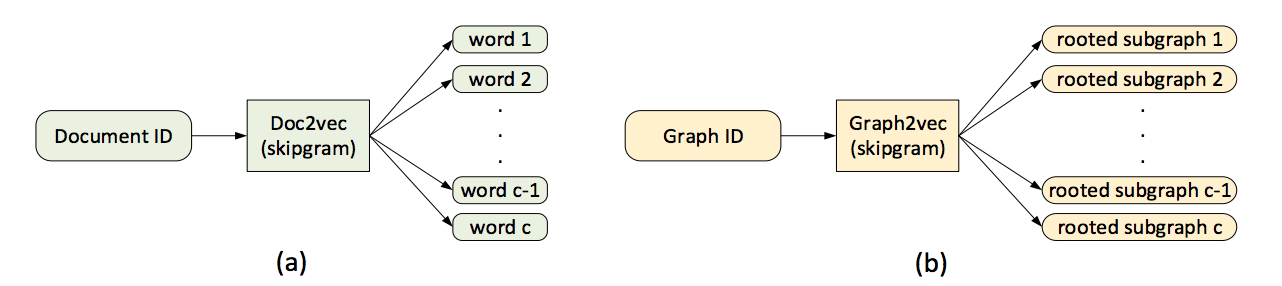
[paper](https://arxiv.org/pdf/1707.05005.pdf)

# Graph Data Representation
- So far we have been working with structured grid data structures.
- CNN has been very successful on graph data structures.
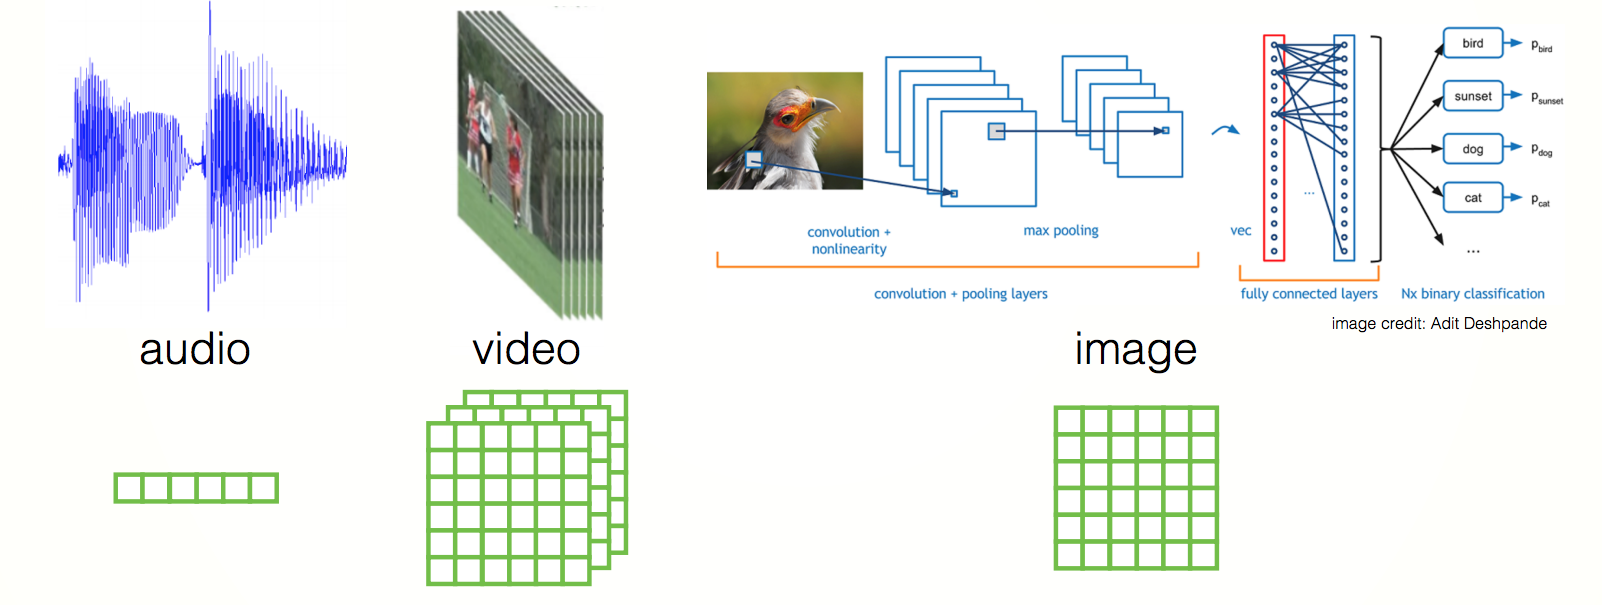
*image is borrowed from [Li Yi](http://graphics.stanford.edu/courses/cs468-17-spring/LectureSlides/GraphCNN.pdf)*


# Non-Structured Data
- Most data cannot be represented as a straight-forward euclidean data structure.
- Convolutions on grids ignore structural information and geometry.

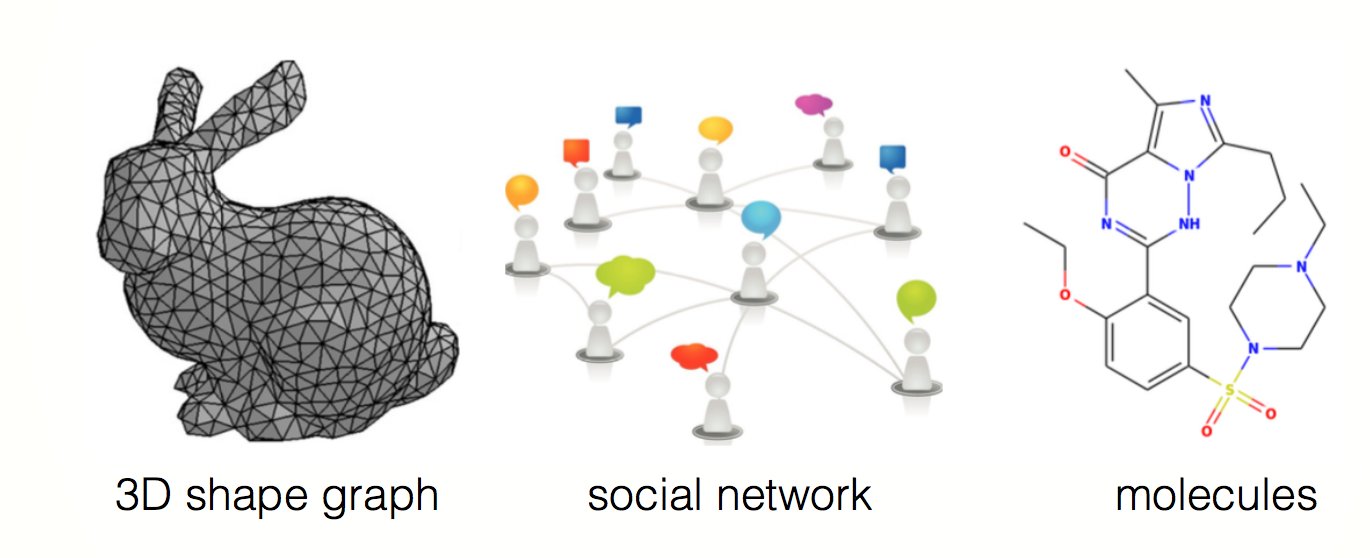
*image is borrowed from [Li Yi](http://graphics.stanford.edu/courses/cs468-17-spring/LectureSlides/GraphCNN.pdf)*


# Graph Representation
- We can use graph as a universal representation of data that:
 - includes structure that can be captured through mechanisms such as adjacency matrices, 
 - includes data as node features, 
 - has similarity between adjacent nodes presented as $w_{ij}$.
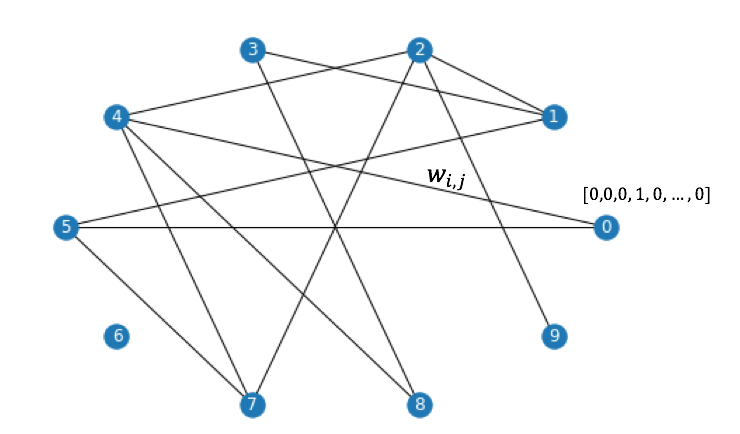

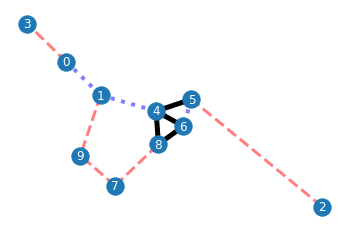

In [150]:
import networkx as nx
import random
import numpy as np
import math
import matplotlib.pyplot as plt

random.seed(42)
N = 10
DROP_RATE=.75
G = nx.complete_graph(n)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()    
G.remove_edges_from(random.sample(G.edges(),k=int(DROP_RATE*G.number_of_edges())))
pos=nx.spring_layout(G)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.7]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.3]
emiddle = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.3 and d['weight'] < 0.7]
nx.draw_networkx_nodes(G, pos, )
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,width=3, alpha=0.5, edge_color='r', style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=emiddle, width=4, alpha=0.5, edge_color='b', style='dotted')
nx.draw_networkx_labels(G, pos, font_color='w', font_family='sans-serif')
plt.axis('off')
plt.show()